<a href="https://colab.research.google.com/github/VilasSonawane/Playstore_-App_Review_Analysis-/blob/main/Copy_of_Team_Notebook_EDA_CAPSTONE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
working_directory = '/content/drive/MyDrive/Data_Squad_EDA/'
app_df =pd.read_csv(working_directory + 'Play Store Data.csv')
review_df =pd.read_csv(working_directory+'User Reviews.csv')

In [ ]:
# Check the structure of the application csv
app_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
# Check the structure of the user review csv
review_df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [ ]:
review_df.shape

(64295, 5)

In [ ]:
review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [ ]:
app_df.shape

(10841, 13)

In [ ]:
app_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


### **ND** - In the following cells we are going to explore each variable of both the data sets and write their descriptions in the data dictionary - [here](https://docs.google.com/spreadsheets/d/1wWjc7jT9jWOZaPxMlAaXPSxA90krAy3SwkazUihiZh4/edit#gid=0)

### We try to get the range of the data if it is numeric type and get the number of unique elements if it is categorical data

In [ ]:
# ND
# Check the number of unique apps available in the dataset
app_df['App'].nunique()

9660

In [ ]:
app_df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [ ]:
app_df['Category'].nunique()

34

In [ ]:
app_df['Rating'].describe()

count    9367.000000
mean        4.193338
std         0.537431
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max        19.000000
Name: Rating, dtype: float64

In [ ]:
#ND
# Checking how many instances had a rating greater than 5
app_df[app_df['Rating']>5]['Rating']

10472    19.0
Name: Rating, dtype: float64

#### Only one instance had a rating of greater than 5. Also a rating of 19 seems absurd. Since it is just one instance out of 10841, we can ignore it and drop that instance

In [ ]:
#ND
# Dropping the instances whose rating is greater than 5
app_df.drop(labels=app_df[app_df['Rating']>5].index[0], inplace = True)

In [ ]:
# ND
# Converting the reviews written as '3.0M' to 3000000 so that we can convert it to an integer
for index,row in app_df.iterrows():
  if 'M' in row['Reviews']:
    app_df.loc[index,'Reviews'] = float(row['Reviews'][:-1])*(10**6)

app_df['Reviews'] = app_df['Reviews'].astype(int)

In [ ]:
# Checking if the data type is proper
app_df['Reviews'].dtype

dtype('int64')

In [ ]:
# Since it is a numerical variable now, we can check the range of it
app_df['Reviews'].describe()

count    1.084000e+04
mean     4.441529e+05
std      2.927761e+06
min      0.000000e+00
25%      3.800000e+01
50%      2.094000e+03
75%      5.477550e+04
max      7.815831e+07
Name: Reviews, dtype: float64

In [ ]:
# ND
# Exploring the size column
app_df['Size'].head()

0     19M
1     14M
2    8.7M
3     25M
4    2.8M
Name: Size, dtype: object

In [ ]:
app_df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [ ]:
#ND
# Check how many instances have the app size expressed in MB
sum(app_df['Size'].apply(lambda x: int('M' in x)))

8829

In [ ]:
#ND
# Check how many instances have the app size expressed in KB
sum(app_df['Size'].apply(lambda x: int('k' in x)))

316

In [ ]:
#ND
# Check how many instances have an app size that varies with the device
sum(app_df['Size']=='Varies with device')

1695

In [ ]:
#VS
# Data cleaning for "Size" column and converting M & K in to equivlant MB
 
app_df['Size'] = app_df['Size'].apply(lambda x: x.rstrip('M'))
app_df['Size'] =app_df['Size'].apply(lambda x: str(round((float(x.rstrip('k'))/1024), 1)) if x[-1]=='k' else x)

In [ ]:
app_df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

As we have seen above in "Size" column is having value 'Varies with device' as that value will not be having any meaning in analysis it is equivalant null value so lets convert it into null value

In [ ]:
#VS
# Data cleaning for "Size" column and handeling Missing values 'Varies with device'

app_df['Size'] =app_df['Size'].apply(lambda x: np.nan if x.startswith('Varies') else x)


In [ ]:
app_df['Size'].unique()

array(['19', '14', '8.7', '25', '2.8', '5.6', '29', '33', '3.1', '28',
       '12', '20', '21', '37', '2.7', '5.5', '17', '39', '31', '4.2',
       '7.0', '23', '6.0', '6.1', '4.6', '9.2', '5.2', '11', '24', nan,
       '9.4', '15', '10', '1.2', '26', '8.0', '7.9', '56', '57', '35',
       '54', '0.2', '3.6', '5.7', '8.6', '2.4', '27', '2.5', '16', '3.4',
       '8.9', '3.9', '2.9', '38', '32', '5.4', '18', '1.1', '2.2', '4.5',
       '9.8', '52', '9.0', '6.7', '30', '2.6', '7.1', '3.7', '22', '7.4',
       '6.4', '3.2', '8.2', '9.9', '4.9', '9.5', '5.0', '5.9', '13', '73',
       '6.8', '3.5', '4.0', '2.3', '7.2', '2.1', '42', '7.3', '9.1', '55',
       '0.0', '6.5', '1.5', '7.5', '51', '41', '48', '8.5', '46', '8.3',
       '4.3', '4.7', '3.3', '40', '7.8', '8.8', '6.6', '5.1', '61', '66',
       '0.1', '8.4', '44', '0.7', '1.6', '6.2', '53', '1.4', '3.0', '5.8',
       '3.8', '9.6', '45', '63', '49', '77', '4.4', '4.8', '70', '6.9',
       '9.3', '10.0', '8.1', '36', '84', '97', '2.

In [ ]:
#Getting the information about column Size
app_df['Size'].describe()

count     9145
unique     460
top        11M
freq       198
Name: Size, dtype: object

In [ ]:
#Count of Null Value
sum(app_df['Size'].isnull())

1695

In [ ]:
app_df['Size'].value_counts()

11M     198
12M     196
14M     194
13M     191
15M     184
       ... 
306k      1
658k      1
74k       1
121k      1
173k      1
Name: Size, Length: 460, dtype: int64

#### So all the instances have sizes listed as MB or NaN so now no absurd Data

In [ ]:
app_df.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


In [ ]:
# ND
# Exploring the 'Installs' column
# Getting the list of unique buckets for number of installations
sorted(list(app_df['Installs'].unique()))

['0',
 '0+',
 '1+',
 '1,000+',
 '1,000,000+',
 '1,000,000,000+',
 '10+',
 '10,000+',
 '10,000,000+',
 '100+',
 '100,000+',
 '100,000,000+',
 '5+',
 '5,000+',
 '5,000,000+',
 '50+',
 '50,000+',
 '50,000,000+',
 '500+',
 '500,000+',
 '500,000,000+']

In [ ]:
app_df['Installs'].nunique()

21

In [ ]:
# ND
# Exploring the type column
app_df['Type'].unique()

array(['Free', 'Paid', nan], dtype=object)

In [ ]:
sum(app_df['Type'].isnull())

1

#### Only one null value in the 'Type' column. We can drop it.

In [ ]:
# Dropping the instance with missing 'Type' column value
app_df = app_df[~(app_df['Type'].isnull())]

In [ ]:
#ND
# Exploring the price  column
app_df['Price'].nunique()

93

In [ ]:
app_df['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', 'Everyone', '$1.20', '$1.04'], dtype=object)

In [ ]:
# ND
# Converting the price to a float type
for index,row in app_df.iterrows():
  if '$' in row['Price']:
    app_df.loc[index,'Price'] = float(row['Price'][1:])
  else:
    app_df.loc[index,'Price'] = float(row['Price'])

app_df['Price'] = app_df['Price'].astype(float)

In [ ]:
app_df['Price'].describe()

count     10840.0
unique      106.0
top           0.0
freq       9697.0
Name: Price, dtype: float64

In [ ]:
#ND
# Exploring the content rating column
app_df['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated', nan], dtype=object)

In [ ]:
# ND
# Exploring the genres column
app_df['Genres'].unique()

array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Art & Design;Action & Adventure',
       'Auto & Vehicles', 'Beauty', 'Books & Reference', 'Business',
       'Comics', 'Comics;Creativity', 'Communication', 'Dating',
       'Education;Education', 'Education', 'Education;Creativity',
       'Education;Music & Video', 'Education;Action & Adventure',
       'Education;Pretend Play', 'Education;Brain Games', 'Entertainment',
       'Entertainment;Music & Video', 'Entertainment;Brain Games',
       'Entertainment;Creativity', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Lifestyle;Pretend Play',
       'Adventure;Action & Adventure', 'Arcade', 'Casual', 'Card',
       'Casual;Pretend Play', 'Action', 'Strategy', 'Puzzle', 'Sports',
       'Music', 'Word', 'Racing', 'Casual;Creativity',
       'Casual;Action & Adventure', 'Simulation', 'Adventure', 'Board',
       'Trivia', 'Role 

In [ ]:
app_df['Genres'].nunique()

119

In [ ]:
# ND
# Exploring the last updated column
app_df['Last Updated'].head(10)

0       January 7, 2018
1      January 15, 2018
2        August 1, 2018
3          June 8, 2018
4         June 20, 2018
5        March 26, 2017
6        April 26, 2018
7         June 14, 2018
8    September 20, 2017
9          July 3, 2018
Name: Last Updated, dtype: object

In [ ]:
# ND
# Exploring the current version column
app_df['Current Ver'].head(10)

0                 1.0.0
1                 2.0.0
2                 1.2.4
3    Varies with device
4                   1.1
5                   1.0
6                   1.1
7              6.1.61.1
8                 2.9.2
9                   2.8
Name: Current Ver, dtype: object

In [ ]:
# Looking at the Android version column
app_df['Android Ver'].head(10)

0    4.0.3 and up
1    4.0.3 and up
2    4.0.3 and up
3      4.2 and up
4      4.4 and up
5      2.3 and up
6    4.0.3 and up
7      4.2 and up
8      3.0 and up
9    4.0.3 and up
Name: Android Ver, dtype: object

### Exploring the user review dataset

In [ ]:
review_df.shape

(64295, 5)

In [ ]:
review_df.columns

Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')

In [ ]:
# Exploring the app column
# Finding the number of unique apps in this dataset
review_df['App'].nunique()

1074

In [ ]:
# Exploring the sentiment column
review_df['Sentiment'].unique()

array(['Positive', nan, 'Neutral', 'Negative'], dtype=object)

In [ ]:
# Exploring the sentiment polarity column
review_df['Sentiment_Polarity'].dtype

dtype('float64')

In [ ]:
review_df['Sentiment_Polarity'].describe()

count    37432.000000
mean         0.182146
std          0.351301
min         -1.000000
25%          0.000000
50%          0.150000
75%          0.400000
max          1.000000
Name: Sentiment_Polarity, dtype: float64

In [ ]:
# Exploring the sentiment subjectivity column
review_df['Sentiment_Subjectivity'].dtype

dtype('float64')

In [ ]:
review_df['Sentiment_Subjectivity'].describe()

count    37432.000000
mean         0.492704
std          0.259949
min          0.000000
25%          0.357143
50%          0.514286
75%          0.650000
max          1.000000
Name: Sentiment_Subjectivity, dtype: float64

## Handling missing values in the app_df dataset

In [ ]:
app_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10839 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10839 non-null  object 
 1   Category        10839 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10839 non-null  int64  
 4   Size            9145 non-null   object 
 5   Installs        10839 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10839 non-null  float64
 8   Content Rating  10839 non-null  object 
 9   Genres          10839 non-null  object 
 10  Last Updated    10839 non-null  object 
 11  Current Ver     10831 non-null  object 
 12  Android Ver     10837 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 1.5+ MB


In [ ]:
10839-9366

1473

#### Ratings column is a key performance indicator and it has 1473 missing entries

# Current version and android version have very few missing entries which can be dropped for simplicity

In [ ]:
# Dropping the missing entries in current ver and android ver columns
app_df = app_df[~((app_df['Current Ver'].isnull())|(app_df['Android Ver'].isnull()))]

In [ ]:
app_df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [ ]:
app_df['Installs'].unique()[0]

'10,000+'

In [ ]:
app_df['Numeric_Installs'] = app_df['Installs'].apply(lambda x: int(x[:-1].replace(',','')))

In [ ]:
app_df['Numeric_Installs']

0           10000
1          500000
2         5000000
3        50000000
4          100000
           ...   
10836        5000
10837         100
10838        1000
10839        1000
10840    10000000
Name: Numeric_Installs, Length: 10829, dtype: int64

In [ ]:
app_df.groupby(by = 'Type')[['Rating','Reviews','Installs']].mean()

,Rating,Reviews
Type,,
Free,4.186288,478992.652711
Paid,4.266822,11716.737767


In [ ]:
d = app_df.groupby(by=['Installs','Numeric_Installs','Type'])[['Rating','Reviews']].mean().unstack().reset_index().sort_values(by='Numeric_Installs')
d.drop('Numeric_Installs',level = 0,axis = 1,inplace = True)
d.columns = ['Installs','Avg_Rating_Free','Avg_Rating_Paid','Avg_Reviews_Free','Avg_Reviews_Paid']

In [ ]:
d.head()

,Installs,Avg_Rating_Free,Avg_Rating_Paid,Avg_Reviews_Free,Avg_Reviews_Paid
0,0+,NaN,NaN,0.000000,0.000000
1,1+,5.000000,5.000000,0.282609,0.333333
11,5+,4.611111,NaN,0.585714,0.250000
5,10+,4.664706,4.511111,0.943038,1.739130
14,50+,4.573810,3.957143,2.362573,2.411765


In [ ]:
d[['Installs','Avg_Rating_Free','Avg_Rating_Paid']].plot(kind = 'bar', colormap = cm.Accent)


NameError: ignored

In [ ]:
ax.bar()

NameError: ignored

In [ ]:
tmp = app_df.groupby(by=['Installs','Numeric_Installs','Type'])[['Rating','Reviews']].mean().reset_index().sort_values('Numeric_Installs').drop('Numeric_Installs',axis =1)
tmp.rename(columns={'Rating':'Average Rating',
                  'Reviews': 'Average Number of Reviews'},inplace = True)
tmp.head(10)
free = tmp[tmp['Type']=='Free']
paid = tmp[tmp['Type']=='Paid']
print(free.shape)
print(paid.shape)
free

(20, 4)
(15, 4)


,Installs,Type,Average Rating,Average Number of Reviews
0,0+,Free,NaN,0.000000e+00
2,1+,Free,5.000000,2.826087e-01
20,5+,Free,4.611111,5.857143e-01
9,10+,Free,4.664706,9.430380e-01
25,50+,Free,4.573810,2.362573e+00
15,100+,Free,4.401653,4.808682e+00
30,500+,Free,4.179394,9.575862e+00
4,"1,000+",Free,4.047461,2.553765e+01
22,"5,000+",Free,4.010165,7.033741e+01
11,"10,000+",Free,3.999091,2.405742e+02


In [ ]:
import numpy as np

value = np.random.randint(1, 20, 10)
type = np.random.choice([0, 1, 2], 10)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn
seaborn.set() #make the plots look pretty

df = pd.DataFrame({'value': value, 'type': type})
df['dummy'] = 1
ag = df.groupby(['value','type']).sum().unstack()
ag.columns = ag.columns.droplevel()
ag
#ag.plot(kind = 'bar', colormap = cm.Accent, width = 1)
#plt.show()

type,0,1,2
value,,,
1,NaN,1.0,NaN
2,NaN,1.0,NaN
5,NaN,1.0,NaN
6,NaN,2.0,NaN
11,NaN,NaN,1.0
12,1.0,NaN,NaN
15,NaN,NaN,1.0
17,NaN,NaN,1.0
19,1.0,NaN,NaN


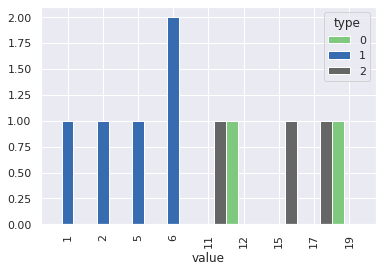

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn
seaborn.set() #make the plots look pretty

ag = df.groupby(['value','type']).sum().unstack()
ag.columns = ag.columns.droplevel()

ag.plot(kind = 'bar', colormap = cm.Accent, width = 1)
plt.show()

In [ ]:
x = np.arange(len(sales_df['month_number']))
width = 0.35
fig,ax = plt.subplots()
bar1 = ax.bar(x-width/2,sales_df['facecream'],width,label = 'Facecream sales')
bar1 = ax.bar(x+width/2,sales_df['facewash'],width,label = 'Facewash sales')
ax.set_ylabel('Month Number')
ax.set_xlabel('No of units sold')
ax.set_title('Number of units of facecream and facewash sold per month')
ax.legend()
plt.show()

NameError: ignored

In [ ]:
app_df.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19,"10,000+",Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


In [ ]:
#VS  In Install column let remove "+"&  "," sign from column so that we can simplify data to analyse in better way 
# Data cleaning of  "Installs" column
app_df['Installs'] = app_df['Installs'].map(lambda x: x.rstrip('+'))
app_df['Installs'] = app_df['Installs'].map(lambda x: ''.join(x.split(',')))
app_df['Installs'] = app_df['Installs'].astype(int)

In [ ]:
app_df.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


In [ ]:
app_df.groupby(by = 'Type')[['Rating','Reviews','Installs']].describe()

Rating                      ...  Installs                         
       count      mean       std  ...       50%        75%           max
Type                              ...                                   
Free  8715.0  4.186288  0.512335  ...  100000.0  5000000.0  1.000000e+09
Paid   645.0  4.266822  0.548247  ...    1000.0    10000.0  1.000000e+07

[2 rows x 24 columns]

In [ ]:
app_df['Category']

0             ART_AND_DESIGN
1             ART_AND_DESIGN
2             ART_AND_DESIGN
3             ART_AND_DESIGN
4             ART_AND_DESIGN
                ...         
10836                 FAMILY
10837                 FAMILY
10838                MEDICAL
10839    BOOKS_AND_REFERENCE
10840              LIFESTYLE
Name: Category, Length: 10829, dtype: object

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn

In [ ]:
#VS 
# lets apply group by function on Catagory and Reviews Columns 
Catagorywise_data=app_df.groupby(['Category'])['Reviews'].sum()
Catagorywise_data

Category
ART_AND_DESIGN            1714385
AUTO_AND_VEHICLES         1163666
BEAUTY                     396240
BOOKS_AND_REFERENCE      21959061
BUSINESS                 13954552
COMICS                    3383276
COMMUNICATION           815462260
DATING                    7291278
EDUCATION                39595786
ENTERTAINMENT            59178154
EVENTS                     161018
FAMILY                  410226107
FINANCE                  17550728
FOOD_AND_DRINK            8883330
GAME                   1585422349
HEALTH_AND_FITNESS       37893743
HOUSE_AND_HOME            3976385
LIBRARIES_AND_DEMO        1016973
LIFESTYLE                12882784
MAPS_AND_NAVIGATION      30659254
MEDICAL                   1585975
NEWS_AND_MAGAZINES       54400863
PARENTING                  958331
PERSONALIZATION          89345721
PHOTOGRAPHY             213516650
PRODUCTIVITY            114116975
SHOPPING                115041222
SOCIAL                  621241422
SPORTS                   70830169
TOOLS

Text(0, 0.5, 'Review ')

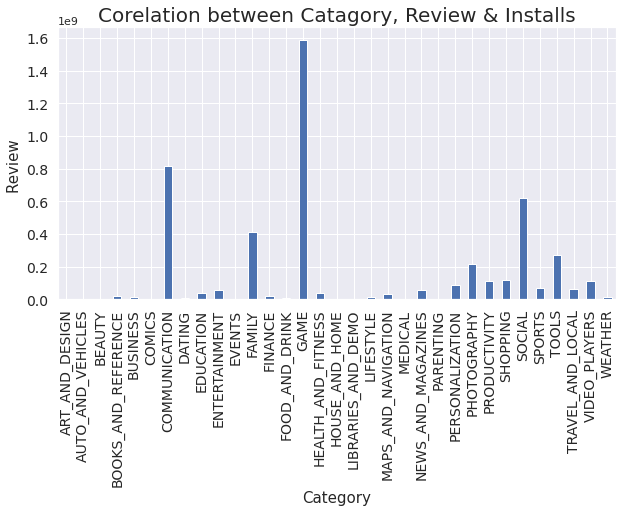

In [ ]:
 #VS
 # Create the plot object Catagory Vs Reviews
ax = Catagorywise_data.plot.bar(figsize = (10,5),fontsize = 14)

# Set the title
ax.set_title("Corelation between Catagory, Review", fontsize = 20)

# Set x and y-labels
ax.set_xlabel("Category", fontsize = 15)
ax.set_ylabel("Review ", fontsize = 15)

In [ ]:
#VS
# lets apply group by function on Catagory and Installs Columns 
Catagorywise_data2=app_df.groupby(['Category'])['Installs'].sum()
Catagorywise_data2

Category
ART_AND_DESIGN           124333100
AUTO_AND_VEHICLES         53130211
BEAUTY                    27197050
BOOKS_AND_REFERENCE     1921468576
BUSINESS                1001914865
COMICS                    56086150
COMMUNICATION          32647276251
DATING                   264310807
EDUCATION                871452000
ENTERTAINMENT           2869160000
EVENTS                    15973161
FAMILY                 10258203405
FINANCE                  876648734
FOOD_AND_DRINK           273898751
GAME                   35086024415
HEALTH_AND_FITNESS      1583072512
HOUSE_AND_HOME           168712461
LIBRARIES_AND_DEMO        61995910
LIFESTYLE                537643539
MAPS_AND_NAVIGATION      724281890
MEDICAL                   53257437
NEWS_AND_MAGAZINES      7496317760
PARENTING                 31521110
PERSONALIZATION         2325483782
PHOTOGRAPHY            10088247655
PRODUCTIVITY           14176091369
SHOPPING                3247848785
SOCIAL                 14069867902
SPORTS     

Text(0, 0.5, 'Installs')

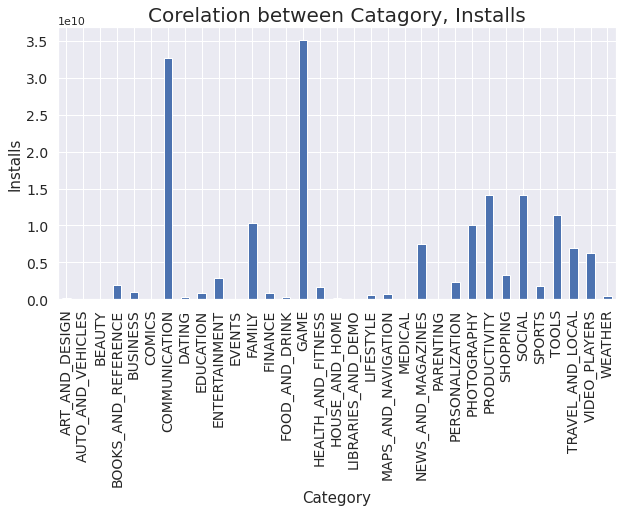

In [ ]:
#VS# Create the plot object Catagory Vs Installs 
ax = Catagorywise_data2.plot.bar(figsize = (10,5),fontsize = 14)

# Set the title
ax.set_title("Corelation between Catagory, Installs", fontsize = 20)

# Set x and y-labels
ax.set_xlabel("Category", fontsize = 15)
ax.set_ylabel("Installs", fontsize = 15)

#VS
If we study **corelation between Catagory Vs Installs and Review**. So we will come to know that "**Communucation**" and "**Game**"are most populer catagories of App.

In [ ]:
#VS 
# lets apply group by function on Catagory and Reviews Columns 
Catagorywise_data=app_df.groupby(['Category'])['Reviews', 'Installs'].sum()
Catagorywise_data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


,Reviews,Installs
Category,,
ART_AND_DESIGN,1714385,124333100
AUTO_AND_VEHICLES,1163666,53130211
BEAUTY,396240,27197050
BOOKS_AND_REFERENCE,21959061,1921468576
BUSINESS,13954552,1001914865
COMICS,3383276,56086150
COMMUNICATION,815462260,32647276251
DATING,7291278,264310807
EDUCATION,39595786,871452000


Text(0, 0.5, 'Installs')

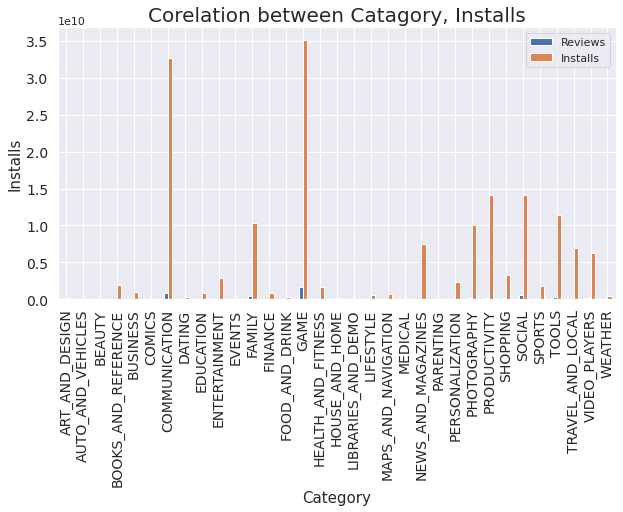

In [ ]:
#VS# Create the plot object Catagory Vs Installs & Reviews
ax = Catagorywise_data.plot.bar(figsize = (10,5),fontsize = 14)

# Set the title
ax.set_title("Corelation between Catagory, Installs", fontsize = 20)

# Set x and y-labels
ax.set_xlabel("Category", fontsize = 15)
ax.set_ylabel("Installs", fontsize = 15)

If we study corelation between Catagory Vs Installs and Review. So we will come to know that "Communucation" and "Game"are most populer catagories of App and also those Catagories of App are having good number of reviews are more installed or loved by custmers.

In [ ]:
import seaborn as sns

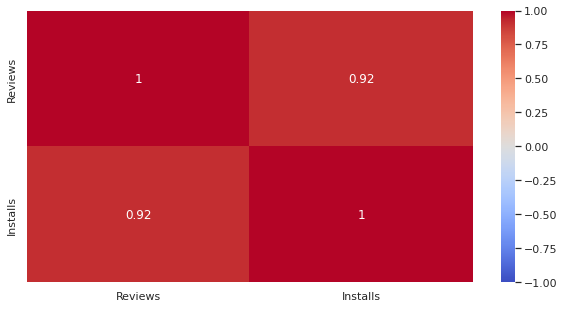

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(Catagorywise_data.corr(), vmin=-1, cmap='coolwarm', annot=True)